In [1]:
from ipynb.fs.defs.covfit import *

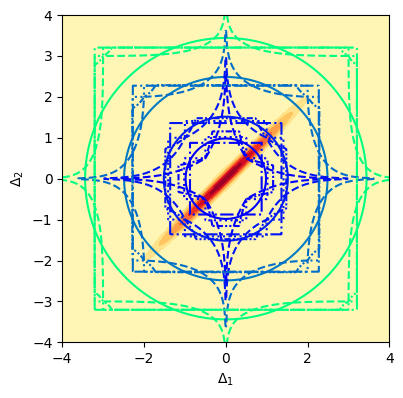

In [2]:
# 2D confidence contours
%matplotlib widget
from matplotlib import pyplot as plt
from scipy.stats import chi, chi2, multivariate_normal

x = np.linspace(-4.0, 4.0, 500)
y = np.linspace(-4.0, 4.0, 500)
xx, yy = np.meshgrid(x, y)
data = np.concatenate((xx[...,np.newaxis], yy[...,np.newaxis]), axis=-1)

CL = chi.cdf([0.5, 1, 2, 3], df=1)
l2 = chi2.ppf(CL, df=2)
l1 = chi2.ppf(CL, df=1)

plt.ioff()
fig, ax = plt.subplots(figsize=(4,4))
#fig.canvas.resizable=False
fig.canvas.header_visible = False
plt.ion()
fig.tight_layout()
ax.set_aspect("equal")
ax.set_xlabel(r"$\Delta_1$")
ax.set_ylabel(r"$\Delta_2$")

cmap = "winter"
cont = {}
zz = naive(data)
cont["naive"] = ax.contour(xx, yy, zz, levels=l2, cmap=cmap, linestyles="solid")

zz = scaled(data, 2)
cont["fitted"] = ax.contour(xx, yy, zz, levels=l1, cmap=cmap, linestyles="dashdot")

zz = invariant1(data)
cont["invariant 1"] = ax.contour(xx, yy, zz, levels=l1, cmap=cmap, linestyles="dashed")

zz = invariant2(data)
cont["invariant 2"] = ax.contour(xx, yy, zz, levels=l1, cmap=cmap, linestyles="dotted")

zz = invariant3(data, alpha=2/3)
cont["invariant 3"] = ax.contour(xx, yy, zz, levels=l1, cmap=cmap, linestyles=[(0,(3,1,1,1,1,1))])

# Add some "data"
cmap = "YlOrRd"
dat = {}
dist = multivariate_normal(mean=[0,0], cov=[[1,0],[0,1]])
zz = dist.pdf(data)
dat["0% corr"] = ax.contourf(xx, yy, zz, cmap=cmap)

dist = multivariate_normal(mean=[0,0], cov=[[1,.5],[.5,1]])
zz = dist.pdf(data)
dat["50% corr"] = ax.contourf(xx, yy, zz, cmap=cmap)

dist = multivariate_normal(mean=[0,0], cov=[[1,.9],[.9,1]])
zz = dist.pdf(data)
dat["90% corr"] = ax.contourf(xx, yy, zz, cmap=cmap)

dist = multivariate_normal(mean=[0,0], cov=[[1,.99],[.99,1]])
zz = dist.pdf(data)
dat["99% corr"] = ax.contourf(xx, yy, zz, cmap=cmap)

display(fig)

In [3]:
# Interactive plot
import ipywidgets as widgets

state = {}
for k in cont:
    state[k] = True
state["data"] = ["None"] + list(dat.keys())
    
def toggle_visibility(data="None", **kwargs):
    for k, v in kwargs.items():
        for a in cont[k].collections:
             a.set_visible(v)
    for k in dat:
        v = (k == data)
        for a in dat[k].collections:
            a.set_visible(v)
            
w = widgets.interactive(toggle_visibility, **state)
ui = widgets.AppLayout(left_sidebar=fig.canvas, right_sidebar=w)
display(ui)
fig.tight_layout()

AppLayout(children=(Canvas(header_visible=False, layout=Layout(grid_area='left-sidebar'), toolbar=Toolbar(tool…

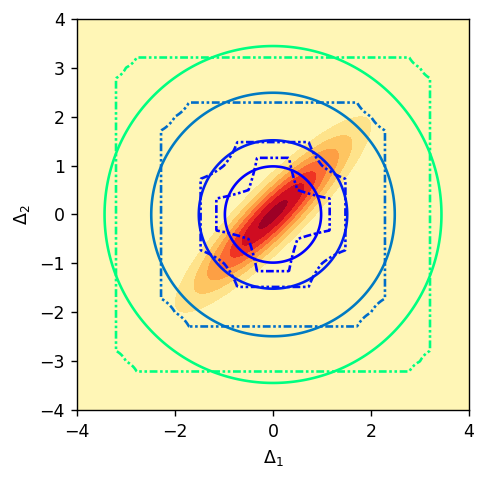

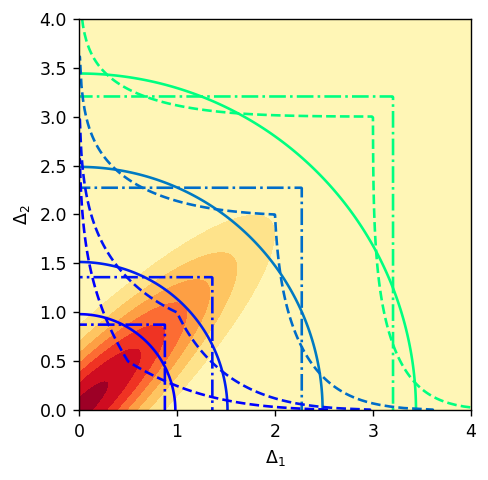

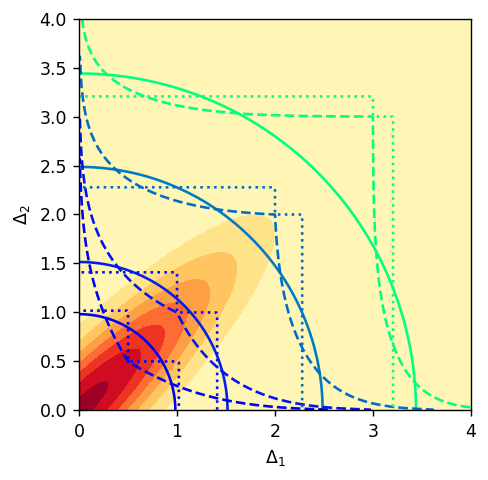

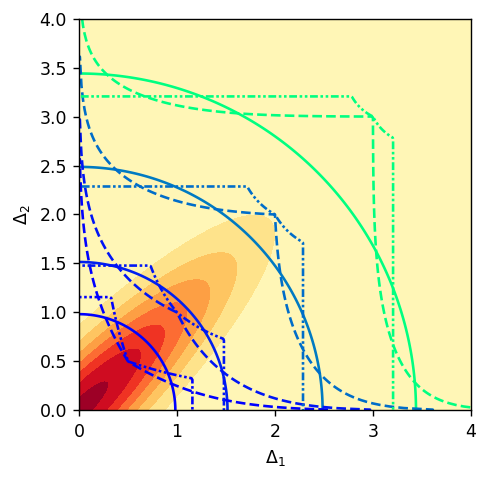

(-4.0, 4.0)

In [5]:
# Detail plots
state["data"] = "90% corr"
state["fitted"] = False
state["invariant 1"] = False
state["invariant 2"] = False
state["invariant 3"] = True
toggle_visibility(**state)
fig.savefig("plots/CR-1.pdf")
display(fig)
ax.set_xlim(0,4)
ax.set_ylim(0,4)
state["fitted"] = True
state["invariant 1"] = True
state["invariant 2"] = False
state["invariant 3"] = False
toggle_visibility(**state)
fig.savefig("plots/CR-2.pdf")
display(fig)
state["fitted"] = False
state["invariant 1"] = True
state["invariant 2"] = True
state["invariant 3"] = False
toggle_visibility(**state)
fig.savefig("plots/CR-3.pdf")
display(fig)
state["fitted"] = False
state["invariant 1"] = True
state["invariant 2"] = False
state["invariant 3"] = True
toggle_visibility(**state)
fig.savefig("plots/CR-4.pdf")
display(fig)
ax.set_xlim(-4,4)
ax.set_ylim(-4,4)